In [1]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
from scipy.integrate import solve_ivp
# from fluidlib import flow_prop_calc as f
import gc


REFPROP unavailable, defaulting to CoolProp


[[200.         200.         200.         ... 200.         200.
  200.        ]
 [300.         300.         300.         ... 300.         300.
  300.        ]
 [350.         346.11280955 342.50311308 ... 299.4134245  299.41342452
  299.41342454]]


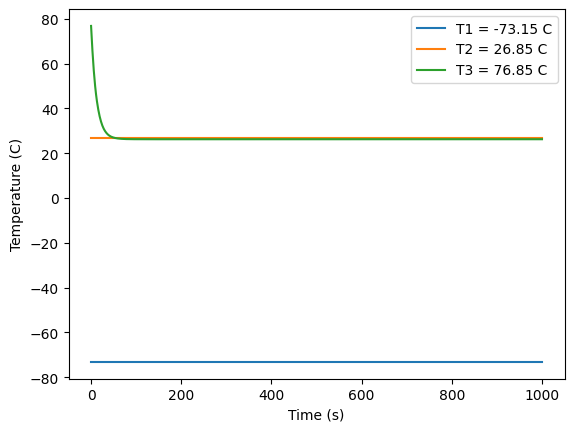

In [11]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
from scipy.integrate import solve_ivp
# from fluidlib import flow_prop_calc as f
import gc

node1 = t.Node(
    T = 300,
    medium="AIR",
    medium_type="FLUID",
    Pressure= 101325,
    isothermal=True
)
node2 = t.Node(
    T = 200, 
    medium= "ARGON", 
    medium_type="FLUID", 
    Pressure=101325,
    isothermal=True,
)
node3 = t.Node(
    T = 350, 
    medium="SS316", 
    medium_type="SOLID",
    V = 0.001
)


a = t.Path(
    nodeA = node3,
    nodeB = node2,
    Aconv = 0.1,
    h = 20
)
b = t.Path(
    nodeA = node1,
    nodeB= node3,
    Aconv = 0.1,
    h = 10
)


n = 3
paths = (a,b)
nodes = [node2, node1,node3]

t_span=[0,1000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = t.T_vs_t(t_span, t_eval,paths,nodes)
print(sol.y)
for i in range(n):
    plt.figure(1)
    plt.plot(sol.t, sol.y[i]-273.15,label="T" + str(i+1) + " = " + str(round(sol.y[i,0]-273.15,2)) + " C")
    plt.xlabel("Time (s)") 
    plt.ylabel("Temperature (C)")
plt.legend()


In [ ]:
print(a.Aconv * a.h * sol.y[])

In [7]:
v.cylinder(1,65.37)
Dh = c.inch2m(5.5)
print(Dh)
A = c.si2sm(.44)
print(A)
c.pa2psi(.175)

0.1397
0.0002838704


2.5381594138157092e-05

In [14]:
VredTee = c.cmm2cin(833070.56)
VFlange = c.cmm2cin(34587.71)
print(VFlange)
V_cylinder = v.cylinder(1, 86.59)
print(str(V_cylinder) + " cu-in")
print(2*c.cmm2cin(34587.11))
print(V_cylinder + 4.22 + (3*2.06))
c.cintocm(57.83)*1000

2.110671563862813
68.00762696858504 cu-in
4.221269899232713
78.40762696858505


0.9476639110381953

In [5]:
V_pipe = v.cylinder(1, 64.42)
V_Flange = v.cylinder(1.05, 2.438)*2 +2.32
V_tee = 3.54
V_elbow = 2.06*2
VTotal = V_pipe + V_Flange + V_tee + V_elbow
c.cintocm(VTotal)*1000



1.0618405382123053

In [6]:
cp=float(c.getFluidProperty(hOut='CPMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN'))
cv=c.getFluidProperty(hOut='CVMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN')
M = c.getFluidProperty(hOut='MOLARMASS', hIn='TD', val1=273, val2 = 0.082, hFLd='HYDROGEN')
print(M)
print(cp)


0.00201588
14196.48992953047


In [7]:
E = mat.getMatProp(mat.SS316, "E")*1e9
print(c.pa2psi(E))
k = mat.getMatProp(mat.SS316, "k")
print(k)
print(c.inch2m(6.25))
print(c.getFluidProperty(hOut= 'V', hIn='TD', val1= 375, val2= 0.082, hFLd='HYDROGEN'))
print(c.si2sm(76.404))

27992272.392367534
16.3
0.15875
1.0431405681397594e-05
0.04929280463999999


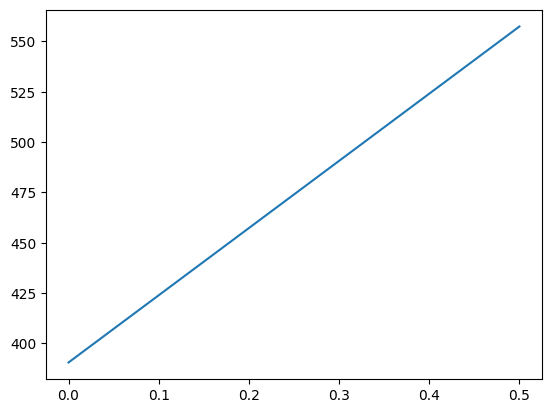

In [8]:
Tm_i = (273+508)/2
x = np.linspace(0,.5, 1000)
D=c.inch2m(.402)
qFlux = 59102 #W/m^2
P= m.pi*D
mdot = .0004 #kg/s
Tmx = Tm_i + qFlux*P/(mdot*14196)*x
plt.plot(x, Tmx)
